In [24]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

## Выберите все подходящие ответы из списка
Предсказание леса - усреднённые предсказания деревьев

Каждое дерево в лесу получает случайный поднабор данных

In [3]:
clf = RandomForestClassifier()

In [5]:
params = {
    'n_estimators': range(10, 20, 10),
    'max_depth': range(2, 20, 2)
}

cv = GridSearchCV(clf, param_grid=params)

In [6]:
train_df = pd.read_csv('titanic_train.csv')

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
X = train_df.drop(labels=['PassengerId', 'Survived', 'Name', 'Cabin'], axis=1)
X = pd.get_dummies(X)

X.Age = X.Age.median()

y = train_df.Survived

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.33,
    random_state=42
)

In [11]:
cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 2),
                         'n_estimators': range(10, 20, 10)})

In [12]:
cv.best_params_

{'max_depth': 16, 'n_estimators': 10}

## Напишите программу. Тестируется через stdin → stdout

```python3
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)

predictions = rf.predict(x_test)
```

In [14]:
best_clf = cv.best_estimator_

best_clf.feature_importances_

array([4.42645588e-02, 0.00000000e+00, 4.52663010e-02, 3.41917542e-02,
       7.55579525e-02, 2.38836918e-01, 1.14526417e-01, 6.33074763e-03,
       1.24034709e-03, 4.12008764e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.80924782e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.31420045e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.56013735e-04,
       0.00000000e+00, 0.00000000e+00, 4.03571261e-05, 0.00000000e+00,
       4.93278725e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.67827513e-03, 0.00000000e+00, 5.15511143e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.92197353e-03, 0.00000000e+00,
       0.00000000e+00, 1.89679340e-04, 0.00000000e+00, 0.00000000e+00,
      

In [18]:
feature_importances_df = pd.DataFrame({
    'features': X_train.columns,
    'feature_importances': best_clf.feature_importances_
})

feature_importances_df

,features,feature_importances
0,Pclass,0.044265
1,Age,0.000000
2,SibSp,0.045266
3,Parch,0.034192
4,Fare,0.075558
...,...,...
686,Ticket_W/C 14208,0.000000
687,Ticket_WE/P 5735,0.000275
688,Embarked_C,0.022771
689,Embarked_Q,0.004156


## Выберите один вариант из списка
3

In [25]:
np.random.seed(0)

df = pd.read_csv('heart.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5)
rf.fit(df.drop(labels=['target'], axis=1), df.target)

RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot:>

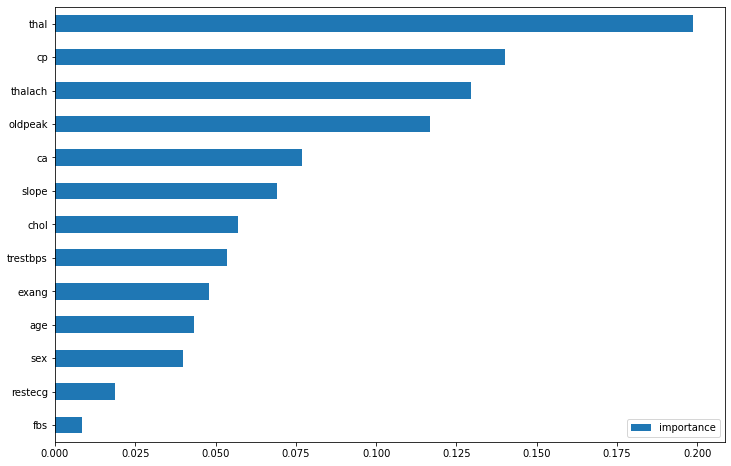

In [27]:
imp = pd.DataFrame(rf.feature_importances_, index=df.drop(columns=['target'], axis=1).columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))